### 474. Case - Aluno
<h1>Desafio final de classificação em Data Science</h1><h2>Introdução</h2><ul><li>Último desafio do curso de Data Science, na parte de classificação</li><li>Caso completo de churn para preparar para o mercado de trabalho</li></ul><h2>Metodologia</h2><ul><li>Seguir o CRISP-DM</li><li>Entendimento das variáveis e dos dados</li><li>Análise descritiva exploratória</li><li>Escolha dos modelos de classificação<ul><li>Planejamento dos modelos</li><li>Análise dos resultados</li><li>Decisão sobre qual implementar</li></ul></li><li>Análise das métricas</li><li>Identificação do melhor modelo pelo desempenho</li></ul><h2>Conclusão</h2><ul><li>Muita sorte no desafio final</li><li>Aguardando no gabarito</li><li>Preparação para o mercado de trabalho em problemas de churn</li></ul>


### 475. Case - Gabarito
<h1>Tema central: Classificação de clientes para prever churn</h1><h2>Pré-processamento dos dados</h2><ul><li>Importação das bibliotecas e da base de dados</li><li>Análise descritiva<ul><li>Quantidade de clientes churn e não churn</li><li>Formas de pagamento mais utilizadas</li><li>Quantidade de clientes por gênero</li></ul></li><li>Separação das features (X) e target (y)</li><li>Encoding da variável target</li><li>Transformação das features categóricas em dummies</li><li>Padronização das features numéricas</li></ul><h2>Modelos</h2><h3>Regressão Logística</h3><ul><li>Treinamento</li><li>Avaliação<ul><li>Matriz de confusão</li><li>Métricas: acurácia, precisão, recall, F1-score</li></ul></li></ul><h3>Random Forest</h3><ul><li>Treinamento</li><li>Avaliação<ul><li>Overfitting detectado pelas métricas</li></ul></li><li>Tuning com GridSearch<ul><li>Melhoria significativa das métricas</li></ul></li></ul><h2>Conclusão</h2><ul><li>Etapas do CRISP-DM concluídas</li><li>Comparação dos modelos e escolha do melhor (Random Forest com Tuning)</li></ul>

In [238]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics


In [239]:
#Target:

#Churn — Cliente deu churn ou não

#Variáveis numéricas:

#Tenure — Número de meses que o cliente está na base
#MonthlyCharges — A quantia consumida por cliente mensalmente
#TotalCharges — A quantia consumida por cliente total

#Variáveis categóricas:

#CustomerID - Id do cliente
#Gender — M/F
#SeniorCitizen — Se o cidadão é ou não idoso (0,1)
#Partner — Se o cliente é ou não casado
#Dependents — Cliente tem dependentes (Yes, No)
#PhoneService — Cliente tem serviço telefonico (Yes, No)
#MulitpleLines — Se o cliente tem várias linhas ou não (Yes, No, No Phone Service)
#InternetService — Tipo do serviço de internet (DSL, Fiber Optic, None)
#OnlineSecurity — Se o cliente tem segurança online (Yes, No, No Internet Service)
#OnlineBackup — WSe o cliente tem Backup Online (Yes, No, No Internet Service)
#DeviceProtection — Se o cliente tem proteção do dispositivo (Yes, No, No Internet Service)
#TechSupport — Se o cliente tem suporte tecnológico (Yes, No, No Internet Service)
#StreamingTV — Se o cliente tem streaming de TV (Yes, No, No Internet Service)
#StreamingMovies — Se o cliente tem serviço de streaming de filmes (Yes, No, No Internet Service)
#Contract — Termo de contrato do cliente (Monthly, 1-Year, 2-Year)
#PaperlessBilling — Se o cliente tem ou não boleto sem papel (Yes, No)
#PaymentMethod — Método de pagamento do cliente(E-Check, Mailed Check, Bank Transfer (Auto), Credit Card (Auto))

In [240]:
churn = pd.read_excel('churn_data.xlsx')
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [241]:
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [242]:
# Quantidade de nulos
churn.isna().count()

customerID          7032
gender              7032
SeniorCitizen       7032
Partner             7032
Dependents          7032
tenure              7032
PhoneService        7032
MultipleLines       7032
InternetService     7032
OnlineSecurity      7032
OnlineBackup        7032
DeviceProtection    7032
TechSupport         7032
StreamingTV         7032
StreamingMovies     7032
Contract            7032
PaperlessBilling    7032
PaymentMethod       7032
MonthlyCharges      7032
TotalCharges        7032
Churn               7032
dtype: int64

In [243]:
churn_agg = churn.groupby('Churn')['customerID'].count().reset_index()
churn_agg

,Churn,customerID
0,No,5163
1,Yes,1869


<Axes: xlabel='Churn', ylabel='customerID'>

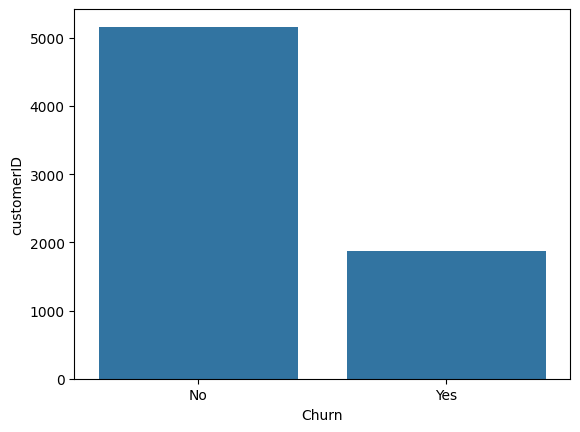

In [244]:
sns.barplot(data= churn_agg, x='Churn', y="customerID")

In [245]:
churn_payment = churn.groupby("PaymentMethod")['customerID'].count().reset_index()
churn_payment= pd.DataFrame(churn_payment)
churn_payment

,PaymentMethod,customerID
0,Bank transfer (automatic),1542
1,Credit card (automatic),1521
2,Electronic check,2365
3,Mailed check,1604


<Axes: xlabel='PaymentMethod', ylabel='customerID'>

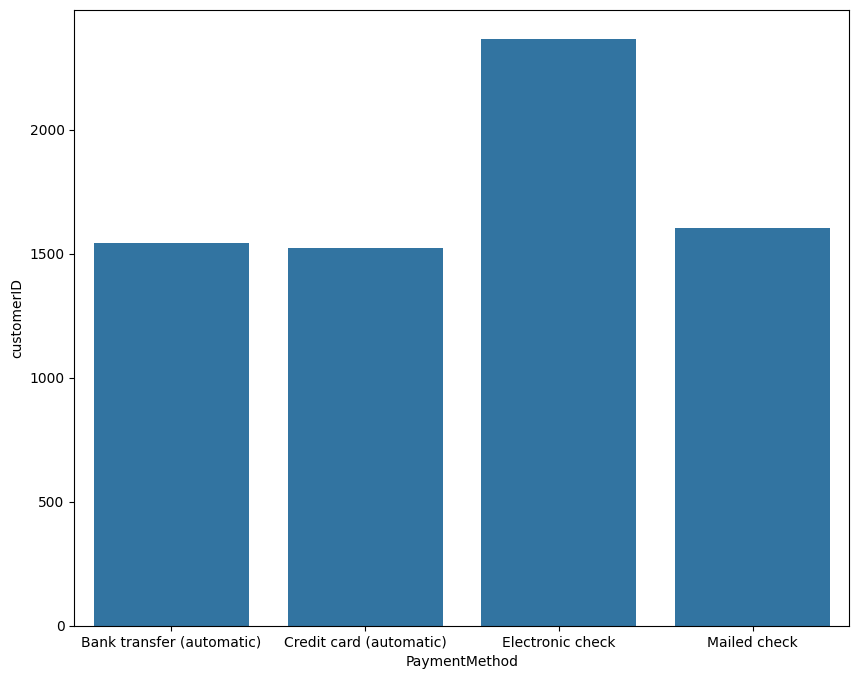

In [246]:
plt.figure(figsize=[10,8])
sns.barplot(data=churn_payment, x = "PaymentMethod", y = "customerID")

In [247]:
churn_gender = churn.groupby("gender")['customerID'].count().reset_index()
churn_gender=pd.DataFrame(churn_gender)
churn_gender

,gender,customerID
0,Female,3483
1,Male,3549


In [248]:
churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [249]:
# Separando nossa base em X e Y 
X = churn.drop(columns=['customerID', 'Churn'], axis = 1)
y = churn[['Churn']]

In [250]:
# Transformando Yes e No
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(y.Churn) 
y.Churn = le.transform(y.Churn)

C:\Users\User\AppData\Local\Temp\ipykernel_16980\1334098233.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.Churn = le.transform(y.Churn)


In [251]:
X = pd.get_dummies(X)
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,True,False,False,True,True,False,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,False,True,True,False,True,False,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,False,True,True,False,True,False,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,False,True,True,False,True,False,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,True,False,True,False,True,False,...,False,True,False,False,False,True,False,False,True,False


In [252]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X = pd.DataFrame(mm.fit_transform(X))


In [253]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [254]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
lr= model.fit(X_train,y_train)

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [255]:
predictions=lr.predict(X_test)

In [256]:
X_test.assign(churn=y_test).assign(label= lr.predict(X_test))

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,churn,label
2824,1.0,0.098592,0.511940,0.062549,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
3578,0.0,0.098592,0.564677,0.073771,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0
6409,0.0,0.422535,0.607463,0.284468,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0
4886,1.0,0.788732,0.525871,0.475571,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0
3215,0.0,0.971831,0.587562,0.632287,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4856,0.0,0.985915,0.944279,0.915584,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0,0
3573,0.0,0.549296,0.626368,0.377741,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0
750,0.0,0.971831,0.615920,0.644051,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0
1564,0.0,0.197183,0.279104,0.071619,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,0


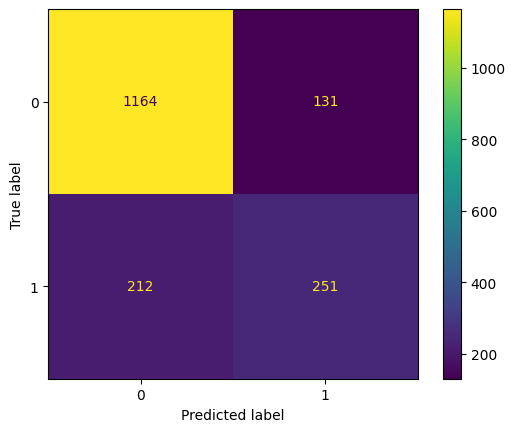

In [257]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm= confusion_matrix(y_test,predictions,labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=lr.classes_)
disp.plot()
plt.show()

In [258]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score,recall_score,f1_score,roc_auc_score
print(f"Acurácia (Treino): {accuracy_score(y_train, lr.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, lr.predict(X_test))}")

print(f"Acurácia Balanceada(Treino): {balanced_accuracy_score(y_train, lr.predict(X_train))}")
print(f"Acurácia Balanceada(Teste): {balanced_accuracy_score(y_test, lr.predict(X_test))}")

print(f"Acurácia Precisão(Treino): {precision_score(y_train, lr.predict(X_train))}")
print(f"Acurácia Precisão(Teste): {precision_score(y_test, lr.predict(X_test))}")

print(f"Recall(Treino): {recall_score(y_train, lr.predict(X_train))}")
print(f"Recall(Teste): {recall_score(y_test, lr.predict(X_test))}")

print(f"F1(Treino): {f1_score(y_train, lr.predict(X_train))}")
print(f"F1(Teste): {f1_score(y_test, lr.predict(X_test))}")

print(f"ROCAUC(Treino): {roc_auc_score(y_train, lr.predict_proba(X_train)[:,1])}")
print(f"ROCAUC(Teste): {roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])}")


Acurácia (Treino): 0.8065984072810012
Acurácia (Teste): 0.8048919226393629
Acurácia Balanceada(Treino): 0.7262255792503982
Acurácia Balanceada(Teste): 0.7204791647556226
Acurácia Precisão(Treino): 0.6646757679180887
Acurácia Precisão(Teste): 0.6570680628272252
Recall(Treino): 0.5540540540540541
Recall(Teste): 0.5421166306695464
F1(Treino): 0.604344453064391
F1(Teste): 0.5940828402366863
ROCAUC(Treino): 0.8473197487205815
ROCAUC(Teste): 0.8441430322639826


In [259]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

In [260]:
rf.fit(X_train,y_train)

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [261]:
predictions=rf.predict(X_test)

In [262]:
X_test.assign(churn = y_test).assign(label=rf.predict(X_test))

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,churn,label
2824,1.0,0.098592,0.511940,0.062549,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,0
3578,0.0,0.098592,0.564677,0.073771,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,1
6409,0.0,0.422535,0.607463,0.284468,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0
4886,1.0,0.788732,0.525871,0.475571,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0
3215,0.0,0.971831,0.587562,0.632287,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4856,0.0,0.985915,0.944279,0.915584,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0,0
3573,0.0,0.549296,0.626368,0.377741,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0
750,0.0,0.971831,0.615920,0.644051,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0
1564,0.0,0.197183,0.279104,0.071619,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,0


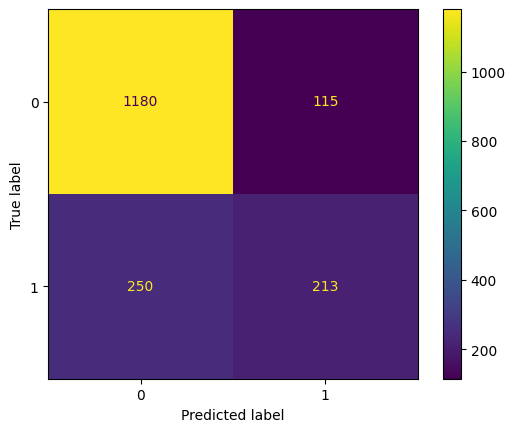

In [263]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm= confusion_matrix(y_test,predictions,labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf.classes_)
disp.plot()
plt.show()

In [264]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score,recall_score,f1_score,roc_auc_score
print(f"Acurácia (Treino): {accuracy_score(y_train, rf.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, rf.predict(X_test))}")

print(f"Acurácia Balanceada(Treino): {balanced_accuracy_score(y_train, rf.predict(X_train))}")
print(f"Acurácia Balanceada(Teste): {balanced_accuracy_score(y_test, rf.predict(X_test))}")

print(f"Acurácia Precisão(Treino): {precision_score(y_train, rf.predict(X_train))}")
print(f"Acurácia Precisão(Teste): {precision_score(y_test, rf.predict(X_test))}")

print(f"Recall(Treino): {recall_score(y_train, rf.predict(X_train))}")
print(f"Recall(Teste): {recall_score(y_test, rf.predict(X_test))}")

print(f"F1(Treino): {f1_score(y_train, rf.predict(X_train))}")
print(f"F1(Teste): {f1_score(y_test, rf.predict(X_test))}")

print(f"ROCAUC(Treino): {roc_auc_score(y_train, rf.predict_proba(X_train)[:,1])}")
print(f"ROCAUC(Teste): {roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 0.9977246871444824
Acurácia (Teste): 0.7923777019340159
Acurácia Balanceada(Treino): 0.9968643397111802
Acurácia Balanceada(Teste): 0.6856200538705938
Acurácia Precisão(Treino): 0.9964387464387464
Acurácia Precisão(Teste): 0.649390243902439
Recall(Treino): 0.9950213371266002
Recall(Teste): 0.46004319654427644
F1(Treino): 0.995729537366548
F1(Teste): 0.538558786346397
ROCAUC(Treino): 0.9999057628629554
ROCAUC(Teste): 0.8257469749910354


In [265]:
from seaborn.axisgrid import Grid
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'n_estimators': [100, 300, 500]}

grid_search = GridSearchCV(rf, parameters, scoring='accuracy', cv=5, n_jobs=-1)

In [266]:
grid_search.fit(X_train, y_train)

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [100, 300, 500]},
             scoring='accuracy')

In [267]:
dict=grid_search.best_estimator_.get_params()
dict

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 300,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [268]:
from sklearn.ensemble import RandomForestClassifier

rf_tunned =  RandomForestClassifier(bootstrap = True, ccp_alpha = 0.0,
                                     class_weight = None, criterion= 'gini',
                                     max_depth = 8, max_features= 'sqrt',
                                     max_leaf_nodes = None,
                                     max_samples = None,
                                     min_impurity_decrease = 0.0,
                                     min_samples_leaf = 1,
                                     min_samples_split = 2,
                                     min_weight_fraction_leaf = 0.0,
                                     n_estimators = 500, n_jobs = None,
                                     oob_score = False, random_state = None,
                                     verbose = 0, warm_start = False)
rf_tunned

RandomForestClassifier(max_depth=8, n_estimators=500)

In [269]:
rf_tunned.fit(X_train,y_train)

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=8, n_estimators=500)

In [270]:
predictions=rf_tunned.predict(X_test)

In [271]:
X_test.assign(churn=y_test).assign(label=rf_tunned.predict(X_test))

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,churn,label
2824,1.0,0.098592,0.511940,0.062549,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
3578,0.0,0.098592,0.564677,0.073771,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0
6409,0.0,0.422535,0.607463,0.284468,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0
4886,1.0,0.788732,0.525871,0.475571,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0
3215,0.0,0.971831,0.587562,0.632287,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4856,0.0,0.985915,0.944279,0.915584,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0,0
3573,0.0,0.549296,0.626368,0.377741,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0
750,0.0,0.971831,0.615920,0.644051,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0
1564,0.0,0.197183,0.279104,0.071619,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,0


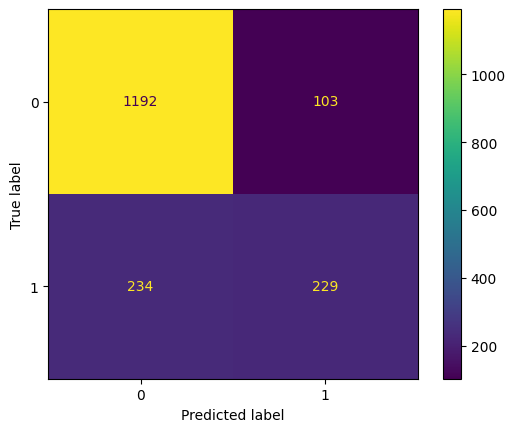

In [273]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm= confusion_matrix(y_test,predictions,labels=rf_tunned.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_tunned.classes_)
disp.plot()
plt.show()

In [275]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score,recall_score,f1_score,roc_auc_score
print(f"Acurácia (Treino): {accuracy_score(y_train, rf_tunned.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, rf_tunned.predict(X_test))}")

print(f"Acurácia Balanceada(Treino): {balanced_accuracy_score(y_train, rf_tunned.predict(X_train))}")
print(f"Acurácia Balanceada(Teste): {balanced_accuracy_score(y_test, rf_tunned.predict(X_test))}")

print(f"Acurácia Precisão(Treino): {precision_score(y_train, rf_tunned.predict(X_train))}")
print(f"Acurácia Precisão(Teste): {precision_score(y_test, rf_tunned.predict(X_test))}")

print(f"Recall(Treino): {recall_score(y_train, rf_tunned.predict(X_train))}")
print(f"Recall(Teste): {recall_score(y_test, rf_tunned.predict(X_test))}")

print(f"F1(Treino): {f1_score(y_train, rf_tunned.predict(X_train))}")
print(f"F1(Teste): {f1_score(y_test, rf_tunned.predict(X_test))}")

print(f"ROCAUC(Treino): {roc_auc_score(y_train, rf_tunned.predict_proba(X_train)[:,1])}")
print(f"ROCAUC(Teste): {roc_auc_score(y_test, rf_tunned.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 0.8312476298824422
Acurácia (Teste): 0.8083048919226393
Acurácia Balanceada(Treino): 0.7498207195929397
Acurácia Balanceada(Teste): 0.7075318762143816
Acurácia Precisão(Treino): 0.7341197822141561
Acurácia Precisão(Teste): 0.6897590361445783
Recall(Treino): 0.5753911806543386
Recall(Teste): 0.4946004319654428
F1(Treino): 0.6451355661881978
F1(Teste): 0.5761006289308176
ROCAUC(Treino): 0.9083827473039905
ROCAUC(Teste): 0.8517074309730897


### 476. Encerramento
<h1>Conclusão do módulo de Classificação em Data Science</h1><h2>Tópicos abordados</h2><h3>Regressão logística</h3><ul><li>Como funciona</li><li>Aplicabilidades</li></ul><h3>Tuning de algoritmos</h3><ul><li>Ajuste de hiperparâmetros de modelos de machine learning para classificação</li></ul><h3>Outros algoritmos de classificação</h3><ul><li>Não especificados</li></ul><h3>Redes neurais</h3><ul><li>Modelos de deep learning para classificação</li></ul><h3>Estudo de caso seguindo CRISP-DM</h3><ul><li>Metodologia para condução de projetos de Data Science</li></ul><h2>Recomendações</h2><ul><li>Buscar conhecimento em artigos e outros cursos</li><li>Praticar muito com diferentes bases de dados</li><li>Tirar dúvidas nos plantões de monitoria</li><li>Participar do DEI (Departamento de Extensão e Inovação)</li><li>Agregar portfólio</li></ul><h2>Considerações finais</h2><ul><li>Agradecimento pela participação no curso</li><li>Despedida</li></ul>